In [32]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from streamlit_elements import nivo, elements, mui

2024-11-21 18:40:14.946 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [45]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(f'../data/players.csv')

In [6]:
df.columns

Index(['id', 'name', 'now_cost', 'position', 'team', 'web_name',
       'transfers_in_event', 'influence_rank_type', 'news_added',
       'ict_index_rank_type', 'assists', 'selected_rank',
       'direct_freekicks_order', 'starts_per_90', 'goals_conceded',
       'threat_rank_type', 'status', 'ep_this', 'news', 'selected_rank_type',
       'goals_scored', 'influence_rank', 'goals_conceded_per_90',
       'selected_by_percent', 'in_dreamteam', 'points_per_game_rank',
       'expected_goal_involvements_per_90', 'influence', 'form_rank_type',
       'expected_goals_conceded_per_90', 'chance_of_playing_this_round',
       'ep_next', 'expected_assists', 'expected_goals_conceded',
       'points_per_game', 'cost_change_start', 'transfers_in', 'starts',
       'cost_change_start_fall', 'creativity', 'saves_per_90', 'threat_rank',
       'penalties_saved', 'points_per_game_rank_type', 'own_goals', 'bonus',
       'penalties_missed', 'expected_goals', 'chance_of_playing_next_round',
       'eve

In [15]:
df.head()

,id,name,now_cost,position,team,web_name,transfers_in_event,influence_rank_type,news_added,ict_index_rank_type,...,now_cost_rank_type,ict_index,now_cost_rank,minutes,yellow_cards,cost_change_event_fall,red_cards,value_form,ict_index_rank,total_points
0,1,Folarin Balogun,44,FWD,Arsenal,Balogun,0,61,2023-08-31T08:55:15.272751Z,63,...,94,0.0,528,0,0,0,0,0.0,628,0
1,2,Cédric Alves Soares,39,DEF,Arsenal,Cédric,433,173,NaN,172,...,231,0.0,729,0,0,0,0,0.0,493,0
2,3,Mohamed Elneny,44,MID,Arsenal,M.Elneny,54,215,2023-12-12T22:30:08.433665Z,214,...,290,0.4,498,1,0,0,0,0.0,470,4
3,4,Fábio Ferreira Vieira,54,MID,Arsenal,Fábio Vieira,5,134,2023-12-07T12:00:08.489004Z,139,...,80,21.9,127,236,0,0,1,0.0,300,21
4,5,Gabriel dos Santos Magalhães,49,DEF,Arsenal,Gabriel,104278,42,2023-09-30T23:00:07.672676Z,47,...,31,43.3,247,1284,1,0,0,0.9,172,56


In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import time
import os
from PIL import Image
from io import BytesIO

In [2]:
from selenium import webdriver

# options = Options()
# options.add_argument("--headless")  # Run in headless mode
# options.add_argument("--disable-gpu")
# options.add_argument("--no-sandbox")
driver = webdriver.Chrome()#options=options)

In [20]:
driver.get('https://www.sofascore.com/player/folarin-balogun/934237')

In [21]:
element = driver.find_elements(By.XPATH, "/html/body/div[1]/main/div[2]/div/div[2]/div[1]/div[1]/div[2]/div/div[1]/div[1]/img")[0]

In [42]:
image_url = element.get_attribute("src")

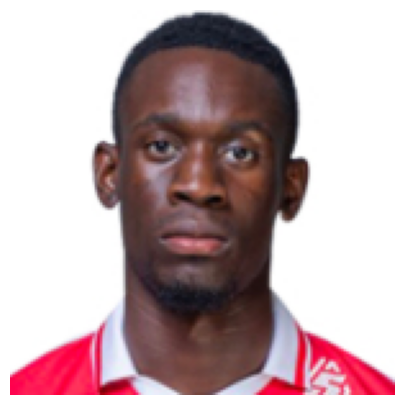

In [46]:
response = requests.get(image_url)

# Check for successful response
if response.status_code == 200:
    # Open the image from the response content
    image = Image.open(BytesIO(response.content))
    
    # Display the image
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')  # Turn off axis for better visualization
    # plt.title("Player Image", fontsize=16)
    plt.show()
else:
    print(f"Failed to fetch image. HTTP Status Code: {response.status_code}")

In [25]:
heatmap = driver.find_elements(By.XPATH,
                               "/html/body/div[1]/main/div[2]/div/div[2]/div[2]/div[2]/div/div[3]/div/div[2]/div/div/div")[0]

In [26]:
heatmap

<selenium.webdriver.remote.webelement.WebElement (session="462e6ce580d36498859be566fe302302", element="f.543162BC3A502CA648E42EE86A6AAB13.d.130F44CC704FA0313595EE18D0AB3E0A.e.38015")>

In [27]:
screenshot = heatmap.screenshot_as_png

In [28]:
import numpy as np

In [29]:
img = np.array(Image.open(BytesIO(screenshot)))
img = np.flipud(np.transpose(img, (1,0,2)))

In [30]:
img.shape

(275, 170, 3)

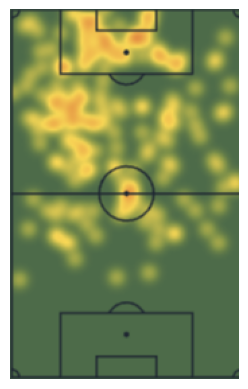

In [33]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [51]:
from selenium.webdriver.support.ui import Select

In [58]:
select = driver.find_elements(By.XPATH, '/html/body/div[1]/header/div[1]/div/div/div[2]/div/div')

In [60]:
select[0].text

'All\nTeam\nPlayer\nMatch\nTournament\nLionel Messi\n909k\nInter Miami CF\nFootball'

In [132]:
def load_gameweek_data_from_github(year: str):
    """Fetches gameweek by gameweek player data from the Github Dataset and returns a DataFrame with selected columns."""
    
    try:
        url_gw = f"https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/{year}/gws/merged_gw.csv"
        df = pd.read_csv(url_gw)
    except Exception as e:
        # st.error(f"There was an error: {e} while retrieving data")
        return pd.DataFrame()
    
    df["position"] = df["position"].apply(lambda x: 'GKP' if x == 'GK' else x)
    
    # Function to remove accents
    def remove_accents(input_str):
        return ''.join(
            char for char in unicodedata.normalize('NFD', input_str)
            if unicodedata.category(char) != 'Mn'
        )

    # Apply the function to the 'web_name' column
    df['name'] = df['name'].apply(remove_accents)
    
    return df

In [133]:
df = load_gameweek_data_from_github('2022')

In [134]:
df

""


In [141]:
year = '2024-25'
url_gw = f"https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/{year}/gws/merged_gw.csv"
df = pd.read_csv(url_gw)

In [142]:
df

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Alex Scott,MID,Bournemouth,1.6,0,0,11,0,12.8,77,...,1,0.0,2,0,0,0,50,False,0,1
1,Carlos Miguel dos Santos Pereira,GK,Nott'm Forest,2.2,0,0,0,0,0.0,427,...,1,0.0,0,0,0,0,45,True,0,1
2,Tomiyasu Takehiro,DEF,Arsenal,0.0,0,0,0,0,0.0,22,...,2,0.0,0,0,0,0,50,True,0,1
3,Malcolm Ebiowei,MID,Crystal Palace,0.0,0,0,0,0,0.0,197,...,2,0.0,0,0,0,0,45,False,0,1
4,Ben Brereton Díaz,MID,Southampton,1.0,0,0,-2,0,14.0,584,...,1,16.0,1,0,0,0,55,False,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7225,Giovani Lo Celso,MID,Spurs,0.0,0,0,0,0,0.0,493,...,1,0.0,0,-70,0,70,49,True,0,11
7226,Tawanda Chirewa,MID,Wolves,0.0,0,0,0,0,0.0,538,...,2,0.0,0,-169,0,169,45,True,0,11
7227,Cameron Humphreys,MID,Ipswich,0.0,0,0,0,0,0.0,273,...,1,0.0,0,-93,0,93,45,False,0,11
7228,Ashley Young,DEF,Everton,4.3,0,0,24,1,33.9,238,...,0,4.0,5,371,10158,9787,45,False,1,11


In [124]:
# Load and preprocess data
# @st.cache_data
# def load_player_data_from_api():
"""Fetches player data from the FPL API and returns a DataFrame with selected columns."""
try:
    response = requests.get("https://fantasy.premierleague.com/api/bootstrap-static/")
    response.raise_for_status()
    data = response.json()
except requests.exceptions.RequestException as e:
    st.error(f"There was an error: {e} while retrieving data")
    # return pd.DataFrame()  # Return empty DataFrame on error

# Load data into DataFrames
df_elements = pd.DataFrame(data["elements"])
df_element_types = pd.DataFrame(data["element_types"])
df_teams = pd.DataFrame(data["teams"])

# Merge df_elements and df_element_types on 'element_type' and 'id'
df_merged = df_elements.merge(
    df_element_types[['id', 'plural_name_short', 'plural_name']],
    left_on='element_type',
    right_on='id',
    how='left'
)

# Merge with teams to get team names
df_merged = df_merged.merge(
    df_teams[['id', 'name']],
    left_on='team',
    right_on='id',
    how='left',
    suffixes=('', '_team')
)

# Rename columnsdd
df_merged.rename(columns={
    'plural_name_short': 'position',
    'name': 'team_name',
    'photo': 'photo',
    'code': 'code'
}, inplace=True)

# Drop redundant columns
df_merged.drop(columns=['id_y', 'id'], inplace=True)
df_merged.rename(columns={'id_x': 'id'}, inplace=True)

# Standardize 'position' to upper case
df_merged['position'] = df_merged['position'].str.upper()

# Add 'player_value_score' (custom metric, here set equal to 'total_points')
df_merged['player_value_score'] = df_merged['total_points']

# Construct player photo URLs
df_merged['photo_url'] = df_merged.apply(
    lambda row: f"https://resources.premierleague.com/premierleague/photos/players/110x140/p{row['code']}.png",
    axis=1
)

print(df_merged.columns)


# Select the desired columns
columns_to_use = [
    'id', 'web_name', 'first_name', 'second_name', 'position', 'plural_name', 'now_cost',
    'total_points', 'player_value_score', 'minutes', 'goals_scored',
    'assists', 'clean_sheets', 'goals_conceded', 'yellow_cards',
    'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
    'threat', 'ict_index', 'selected_by_percent', 'form', 'points_per_game',
    'team_name', 'in_dreamteam', 'dreamteam_count', 'photo_url'
]

# Ensure all selected columns exist in the DataFrame
df = df_merged[columns_to_use]

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'region', 'minutes',
       'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected

In [67]:
df.iloc[0].photo_url

'https://resources.premierleague.com/premierleague/photos/players/110x140/p438098.png'

In [109]:
df.columns

Index(['id', 'web_name', 'first_name', 'second_name', 'position',
       'plural_name', 'now_cost', 'total_points', 'player_value_score',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence',
       'creativity', 'threat', 'ict_index', 'selected_by_percent', 'form',
       'points_per_game', 'team_name', 'in_dreamteam', 'dreamteam_count',
       'photo_url', 'full_name'],
      dtype='object')

In [110]:
df.position[df.web]

0      MID
1      FWD
2      DEF
3      FWD
4      GKP
      ... 
673    DEF
674    DEF
675    MID
676    MID
677    DEF
Name: position, Length: 678, dtype: object

In [116]:
df.head(10)

,id,web_name,first_name,second_name,position,plural_name,now_cost,total_points,player_value_score,minutes,...,threat,ict_index,selected_by_percent,form,points_per_game,team_name,in_dreamteam,dreamteam_count,photo_url,full_name
0,1,Fábio Vieira,Fábio,Ferreira Vieira,MID,Midfielders,54,0,0,0,...,0.0,0.0,0.0,0.0,0.0,Arsenal,False,0,https://resources.premierleague.com/premierlea...,Fábio Ferreira Vieira
1,2,G.Jesus,Gabriel,Fernando de Jesus,FWD,Forwards,68,6,6,121,...,64.0,11.7,0.9,0.7,0.7,Arsenal,False,0,https://resources.premierleague.com/premierlea...,Gabriel Fernando de Jesus
2,3,Gabriel,Gabriel,dos Santos Magalhães,DEF,Defenders,61,45,45,953,...,176.0,50.1,22.4,1.7,4.1,Arsenal,False,1,https://resources.premierleague.com/premierlea...,Gabriel dos Santos Magalhães
3,4,Havertz,Kai,Havertz,FWD,Forwards,80,46,46,990,...,359.0,73.1,11.3,1.3,4.2,Arsenal,False,1,https://resources.premierleague.com/premierlea...,Kai Havertz
4,5,Hein,Karl,Hein,GKP,Goalkeepers,40,0,0,0,...,0.0,0.0,0.0,0.0,0.0,Arsenal,False,0,https://resources.premierleague.com/premierlea...,Karl Hein
5,6,J.Timber,Jurriën,Timber,DEF,Defenders,55,24,24,683,...,42.0,28.5,1.5,1.7,2.7,Arsenal,False,0,https://resources.premierleague.com/premierlea...,Jurriën Timber
6,7,Jorginho,Jorge Luiz,Frello Filho,MID,Midfielders,48,4,4,154,...,1.0,2.7,0.2,0.0,1.3,Arsenal,False,0,https://resources.premierleague.com/premierlea...,Jorge Luiz Frello Filho
7,8,Kiwior,Jakub,Kiwior,DEF,Defenders,48,3,3,96,...,0.0,1.7,0.2,0.3,0.8,Arsenal,False,0,https://resources.premierleague.com/premierlea...,Jakub Kiwior
8,9,Martinelli,Gabriel,Martinelli Silva,MID,Midfielders,69,47,47,678,...,265.0,64.0,3.6,4.0,4.3,Arsenal,False,1,https://resources.premierleague.com/premierlea...,Gabriel Martinelli Silva
9,12,Nwaneri,Ethan,Nwaneri,MID,Midfielders,45,5,5,52,...,20.0,5.0,0.3,0.7,1.0,Arsenal,False,0,https://resources.premierleague.com/premierlea...,Ethan Nwaneri


In [118]:
def get_similar_players(df_new: pd.DataFrame, player_name:str, target_position=None, top_n: int = 5):
    
    """Returns top_n similar players based on the player input. Uses UMAP for dimensional reduction and euclidean distance to find similarities
       Requires sklearn, scipy and umap modules.   
    """
    df = df_new.copy()

    df["now_cost_m"] = df["now_cost"]/10
    
    # target_position = df[df.web_name == player_name].position.values[0]
    # df[df.web_name == 'Havertz'].position.values[0]

    if target_position == 'GKP':
        numeric_features = ["now_cost_m", "total_points", "minutes", "goals_conceded", "clean_sheets", "ict_index"]
    elif target_position == 'DEF':
        numeric_features = ["now_cost_m", "total_points", "minutes", "goals_conceded", "clean_sheets", "assists", "creativity", "goals_scored", "ict_index"]
    elif target_position == "MID":
        numeric_features = ["now_cost_m", "total_points", "minutes", "goals_scored", "assists", "creativity", "influence", "threat", "goals_conceded", "clean_sheets", "ict_index"]
    else:
        numeric_features = ["now_cost_m", "total_points", "minutes", "goals_scored", "assists", "creativity", "influence", "threat", "ict_index"]
    metadata = ['full_name', 'position']
    filtered_data = df[metadata + numeric_features].dropna()
    
    scaler = StandardScaler()
    normalized_features = scaler.fit_transform(filtered_data[numeric_features])

    umap_reducer = umap.UMAP(n_neighbors=5, min_dist=0.1, n_components=2)
    umap_features = umap_reducer.fit_transform(normalized_features)

    distance_matrix_umap = cdist(umap_features, umap_features, metric='euclidean')

    distance_df_umap = pd.DataFrame(distance_matrix_umap, index=filtered_data['full_name'], columns=filtered_data['full_name'])

    if player_name not in distance_df_umap.index:
        return f"Player '{player_name}' not found in the dataset."

    same_position_players = df[df['position'] == target_position]['full_name']
    distances = distance_df_umap.loc[player_name, same_position_players]
    similar_players = distances.sort_values()[1:top_n+1]  # Exclude self (distance = 0)
    return similar_players

In [123]:
import umap

FileNotFoundError: [Errno 2] No such file or directory

In [ ]:
player_position = str(df[df.full_name=='Kai Havertz'].position.values[0])
sim_players = get_similar_players(df, 'Kai Havertz', target_position=player_position ,top_n=5)

In [119]:
df.full_name

0             Fábio Ferreira Vieira
1         Gabriel Fernando de Jesus
2      Gabriel dos Santos Magalhães
3                       Kai Havertz
4                         Karl Hein
                   ...             
673              Toti António Gomes
674                Bastien Meupiyou
675    André Trindade da Costa Neto
676     Carlos Roberto Forbs Borges
677                      Alfie Pond
Name: full_name, Length: 678, dtype: object

In [117]:
df[df.web_name == 'Havertz'].position.values[0]

'FWD'

In [112]:
df.web_name

0      Fábio Vieira
1           G.Jesus
2           Gabriel
3           Havertz
4              Hein
           ...     
673            Toti
674        Meupiyou
675           André
676           Forbs
677            Pond
Name: web_name, Length: 678, dtype: object

In [108]:
df.iloc[:10,:10]

,id,web_name,first_name,second_name,position,plural_name,now_cost,total_points,player_value_score,minutes
0,1,Fábio Vieira,Fábio,Ferreira Vieira,MID,Midfielders,54,0,0,0
1,2,G.Jesus,Gabriel,Fernando de Jesus,FWD,Forwards,68,6,6,121
2,3,Gabriel,Gabriel,dos Santos Magalhães,DEF,Defenders,61,45,45,953
3,4,Havertz,Kai,Havertz,FWD,Forwards,80,46,46,990
4,5,Hein,Karl,Hein,GKP,Goalkeepers,40,0,0,0
5,6,J.Timber,Jurriën,Timber,DEF,Defenders,55,24,24,683
6,7,Jorginho,Jorge Luiz,Frello Filho,MID,Midfielders,48,4,4,154
7,8,Kiwior,Jakub,Kiwior,DEF,Defenders,48,3,3,96
8,9,Martinelli,Gabriel,Martinelli Silva,MID,Midfielders,69,47,47,678
9,12,Nwaneri,Ethan,Nwaneri,MID,Midfielders,45,5,5,52


In [107]:
df.iloc[:10,10:20]

,goals_scored,assists,clean_sheets,goals_conceded,yellow_cards,red_cards,saves,bonus,bps,influence
0,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,2,3,0,0,0,28,17.8
2,2,0,3,11,1,0,0,4,166,260.0
3,4,1,3,12,2,0,0,7,169,234.8
4,0,0,0,0,0,0,0,0,0,0.0
5,0,1,2,7,3,0,0,0,89,117.4
6,0,0,1,1,2,0,0,0,16,4.4
7,0,0,0,4,0,0,0,0,-3,16.2
8,3,2,3,9,0,0,0,4,160,205.4
9,0,0,0,0,0,0,0,0,18,15.8


In [106]:
df.iloc[:10,20:30]

,creativity,threat,ict_index,selected_by_percent,form,points_per_game,team_name,in_dreamteam,dreamteam_count,photo_url
0,0.0,0.0,0.0,0.0,0.0,0.0,Arsenal,False,0,https://resources.premierleague.com/premierlea...
1,36.2,64.0,11.7,0.9,0.7,0.7,Arsenal,False,0,https://resources.premierleague.com/premierlea...
2,64.7,176.0,50.1,22.4,1.7,4.1,Arsenal,False,1,https://resources.premierleague.com/premierlea...
3,137.4,359.0,73.1,11.3,1.3,4.2,Arsenal,False,1,https://resources.premierleague.com/premierlea...
4,0.0,0.0,0.0,0.0,0.0,0.0,Arsenal,False,0,https://resources.premierleague.com/premierlea...
5,127.1,42.0,28.5,1.5,1.7,2.7,Arsenal,False,0,https://resources.premierleague.com/premierlea...
6,21.6,1.0,2.7,0.2,0.0,1.3,Arsenal,False,0,https://resources.premierleague.com/premierlea...
7,1.0,0.0,1.7,0.2,0.3,0.8,Arsenal,False,0,https://resources.premierleague.com/premierlea...
8,169.8,265.0,64.0,3.6,4.0,4.3,Arsenal,False,1,https://resources.premierleague.com/premierlea...
9,13.6,20.0,5.0,0.3,0.7,1.0,Arsenal,False,0,https://resources.premierleague.com/premierlea...


In [94]:
df.loc[:, 'full_name'] = df['first_name'] + ' ' + df['second_name']

In [ ]:
# radar_data[0][p] = float(df[df.full_name==p][metrics[0]].iloc[0]) if df[df.full_name==p][metrics[0]].iloc[0] != '' else 0


In [97]:
metrics = ['creativity', 'threat','ict_index','selected_by_percent','points_per_game']

In [104]:
float(df[df.full_name=='Fábio Ferreira Vieira'][metrics[4]].iloc[0])

0.0

In [105]:
df[df.full_name=='Fábio Ferreira Vieira']

,id,web_name,first_name,second_name,position,plural_name,now_cost,total_points,player_value_score,minutes,...,threat,ict_index,selected_by_percent,form,points_per_game,team_name,in_dreamteam,dreamteam_count,photo_url,full_name
0,1,Fábio Vieira,Fábio,Ferreira Vieira,MID,Midfielders,54,0,0,0,...,0.0,0.0,0.0,0.0,0.0,Arsenal,False,0,https://resources.premierleague.com/premierlea...,Fábio Ferreira Vieira


In [78]:
test_img = 255 * (np.random.randint(0,255,(5,5,3)) > 100).astype(np.uint32)

In [83]:
test_img.shape

(5, 5, 3)

In [87]:
from PIL import Image

In [ ]:
df[df.first==''].photo_url

In [54]:
from selenium.webdriver.common.keys import Keys

In [55]:
driver.find_elements(By.XPATH, '/html/body/div[1]/header/div[1]/div/div/div[2]/div/form/input')[0].send_keys("Lionel Messi")

In [ ]:
driver.find_elements(By.XPATH, '/html/body/div[1]/header/div[1]/div/div/div[2]/div/div/div[2]/div[1]')[0].send_keys(Keys.RETURN)

In [ ]:


def download_heatmaps(player_url, save_directory="heatmaps"):
    # Create directory to save heatmaps
    os.makedirs(save_directory, exist_ok=True)
    
    driver = setup_driver()
    driver.get(player_url)
    
    # Allow the page to load fully
    time.sleep(5)
    
    # Locate the heatmap section
    try:
        heatmap_elements = driver.find_elements(By.CSS_SELECTOR, "img[src*='heatmap']")
        
        if not heatmap_elements:
            print("No heatmaps found on the page.")
            return
        
        for idx, element in enumerate(heatmap_elements):
            # Fetch the heatmap image URL
            heatmap_url = element.get_attribute("src")
            
            # Download the heatmap image
            driver.get(heatmap_url)
            time.sleep(2)
            
            screenshot = driver.get_screenshot_as_png()
            image = Image.open(BytesIO(screenshot))
            save_path = os.path.join(save_directory, f"heatmap_{idx + 1}.png")
            image.save(save_path)
            print(f"Saved heatmap to {save_path}")
    
    except Exception as e:
        print(f"Error occurred: {e}")
    
    finally:
        driver.quit()

# Example usage
player_url = "https://www.sofascore.com/player/phil-foden/859765"
download_heatmaps(player_url)


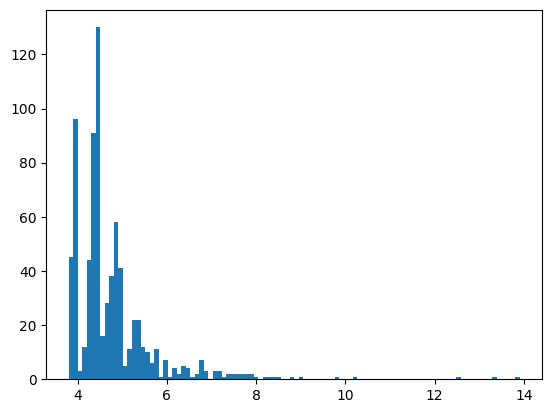

In [18]:
plt.hist(df.now_cost.values/10., bins=100);

In [16]:
df.columns

Index(['id', 'name', 'now_cost', 'position', 'team', 'web_name',
       'transfers_in_event', 'influence_rank_type', 'news_added',
       'ict_index_rank_type', 'assists', 'selected_rank',
       'direct_freekicks_order', 'starts_per_90', 'goals_conceded',
       'threat_rank_type', 'status', 'ep_this', 'news', 'selected_rank_type',
       'goals_scored', 'influence_rank', 'goals_conceded_per_90',
       'selected_by_percent', 'in_dreamteam', 'points_per_game_rank',
       'expected_goal_involvements_per_90', 'influence', 'form_rank_type',
       'expected_goals_conceded_per_90', 'chance_of_playing_this_round',
       'ep_next', 'expected_assists', 'expected_goals_conceded',
       'points_per_game', 'cost_change_start', 'transfers_in', 'starts',
       'cost_change_start_fall', 'creativity', 'saves_per_90', 'threat_rank',
       'penalties_saved', 'points_per_game_rank_type', 'own_goals', 'bonus',
       'penalties_missed', 'expected_goals', 'chance_of_playing_next_round',
       'eve

In [14]:
df.groupby('team').sum()['total_points'].reset_index().sort_values('total_points', ascending=False)

,team,total_points
0,Arsenal,935
10,Liverpool,904
14,Newcastle,887
17,Spurs,863
1,Aston Villa,840
12,Man City,826
9,Fulham,744
18,West Ham,739
6,Chelsea,739
13,Man Utd,730


In [ ]:
data = [
    {"id": "JavaScript", "label": "JavaScript", "value": 55},
    {"id": "Python", "label": "Python", "value": 75},
    {"id": "Java", "label": "Java", "value": 30},
    {"id": "C#", "label": "C#", "value": 20},
    {"id": "PHP", "label": "PHP", "value": 15}
]

In [36]:
df[df.name=='Folarin Balogun'].now_cost / 10.

0    4.4
Name: now_cost, dtype: float64

In [28]:
pie_data=[]
for i in range(df.shape[0]):
    # df.iloc[i]
    pie_data.append({"id": df.iloc[i]['name'], "label": df.iloc[i]['name'], "value": df.iloc[i]['now_cost']/10.})

In [ ]:
radar_data=[]
for i in range(df.shape[0]):
    radar_data.append({"name": df.iloc[i]['name'],
                       "minutes": df.iloc[i]['minutes'],
                       "now_cost_rank": df.iloc[i]['now_cost_rank'],
                       "assists": df.iloc[i]['assistas']
                       "threat_rank": df.iloc[i]['threat_rank'],
                       "yellow_cards": df.iloc[i]['yellow_cards']})

In [39]:
df.columns

Index(['id', 'name', 'now_cost', 'position', 'team', 'web_name',
       'transfers_in_event', 'influence_rank_type', 'news_added',
       'ict_index_rank_type', 'assists', 'selected_rank',
       'direct_freekicks_order', 'starts_per_90', 'goals_conceded',
       'threat_rank_type', 'status', 'ep_this', 'news', 'selected_rank_type',
       'goals_scored', 'influence_rank', 'goals_conceded_per_90',
       'selected_by_percent', 'in_dreamteam', 'points_per_game_rank',
       'expected_goal_involvements_per_90', 'influence', 'form_rank_type',
       'expected_goals_conceded_per_90', 'chance_of_playing_this_round',
       'ep_next', 'expected_assists', 'expected_goals_conceded',
       'points_per_game', 'cost_change_start', 'transfers_in', 'starts',
       'cost_change_start_fall', 'creativity', 'saves_per_90', 'threat_rank',
       'penalties_saved', 'points_per_game_rank_type', 'own_goals', 'bonus',
       'penalties_missed', 'expected_goals', 'chance_of_playing_next_round',
       'eve

In [ ]:
[{'metric': 'points_per_game_rank', 'Folarin Balogun': 635, 'Mohamed Elneny': 55},
 {'metric': 'influence_rank', 'Folarin Balogun': 528, 'Mohamed Elneny': 498}, 
 {'metric': 'now_cost_rank', 'Folarin Balogun': 623, 'Mohamed Elneny': 473}, 
 {'metric': 'selected_rank', 'Folarin Balogun': 325, 'Mohamed Elneny': 438},
 {'metric': 'ict_index_rank_type',
                                                                                                                                                                                                                                                                                                                         'Folarin Balogun': 63, 'Mohamed Elneny': 214}]

In [47]:
radar_data = [{"metric": 'points_per_game_rank'},
                      {"metric": 'influence_rank'},
                      {"metric": 'now_cost_rank'},
                      {"metric": 'selected_rank'},
                      {"metric": 'ict_index_rank_type'}
                    ]           

In [ ]:
df.sort_values()

In [53]:
df

,id,name,now_cost,position,team,web_name,transfers_in_event,influence_rank_type,news_added,ict_index_rank_type,...,now_cost_rank_type,ict_index,now_cost_rank,minutes,yellow_cards,cost_change_event_fall,red_cards,value_form,ict_index_rank,total_points
0,1,Folarin Balogun,44,FWD,Arsenal,Balogun,0,61,2023-08-31T08:55:15.272751Z,63,...,94,0.0,528,0,0,0,0,0.0,628,0
1,2,Cédric Alves Soares,39,DEF,Arsenal,Cédric,433,173,NaN,172,...,231,0.0,729,0,0,0,0,0.0,493,0
2,3,Mohamed Elneny,44,MID,Arsenal,M.Elneny,54,215,2023-12-12T22:30:08.433665Z,214,...,290,0.4,498,1,0,0,0,0.0,470,4
3,4,Fábio Ferreira Vieira,54,MID,Arsenal,Fábio Vieira,5,134,2023-12-07T12:00:08.489004Z,139,...,80,21.9,127,236,0,0,1,0.0,300,21
4,5,Gabriel dos Santos Magalhães,49,DEF,Arsenal,Gabriel,104278,42,2023-09-30T23:00:07.672676Z,47,...,31,43.3,247,1284,1,0,0,0.9,172,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,749,Matthew Whittingham,45,MID,Wolves,Whittingham,13,269,NaN,272,...,250,0.0,428,0,0,0,0,0.0,680,0
765,750,Tawanda Chirewa,45,MID,Wolves,Chirewa,20,277,NaN,280,...,258,0.0,441,0,0,0,0,0.0,693,0
766,751,Justin Hubner,40,DEF,Wolves,Hubner,151,217,NaN,217,...,211,0.0,703,0,0,0,0,0.0,579,0
767,769,Owen Hesketh,45,MID,Wolves,Hesketh,11,257,NaN,260,...,232,0.0,401,0,0,0,0,0.0,663,0


In [57]:
pca = PCA(2)

In [58]:
df_float = df.select_dtypes(include=['float64','int'])
df_float = df_float.iloc[:,1:] #drop ID
df_float = df_float.fillna(0.)

In [59]:
df_float

,now_cost,transfers_in_event,influence_rank_type,ict_index_rank_type,assists,selected_rank,direct_freekicks_order,starts_per_90,goals_conceded,threat_rank_type,...,now_cost_rank_type,ict_index,now_cost_rank,minutes,yellow_cards,cost_change_event_fall,red_cards,value_form,ict_index_rank,total_points
0,44,0,61,63,0,325,0.0,0.00,0,60,...,94,0.0,528,0,0,0,0,0.0,628,0
1,39,433,173,172,0,253,0.0,0.00,0,158,...,231,0.0,729,0,0,0,0,0.0,493,0
2,44,54,215,214,1,438,0.0,0.00,0,207,...,290,0.4,498,1,0,0,0,0.0,470,4
3,54,5,134,139,3,430,0.0,0.76,2,109,...,80,21.9,127,236,0,0,1,0.0,300,21
4,49,104278,42,47,0,21,0.0,0.98,13,24,...,31,43.3,247,1284,1,0,0,0.9,172,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,45,13,269,272,0,746,0.0,0.00,0,269,...,250,0.0,428,0,0,0,0,0.0,680,0
765,45,20,277,280,0,733,0.0,0.00,0,277,...,258,0.0,441,0,0,0,0,0.0,693,0
766,40,151,217,217,0,624,0.0,0.00,0,206,...,211,0.0,703,0,0,0,0,0.0,579,0
767,45,11,257,260,0,769,0.0,0.00,0,255,...,232,0.0,401,0,0,0,0,0.0,663,0


In [60]:
scaler = StandardScaler()

In [61]:
df_scaled = scaler.fit_transform(df_float)

In [62]:
comps = pca.fit_transform(df_scaled)

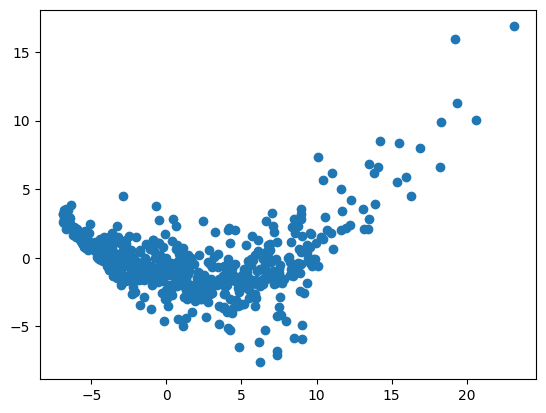

In [63]:
plt.scatter(comps[:,0], comps[:,1])
plt.show()

In [64]:
from sklearn.manifold import TSNE

In [65]:
tsne = TSNE(2)

In [66]:
comps = tsne.fit_transform(df_scaled)

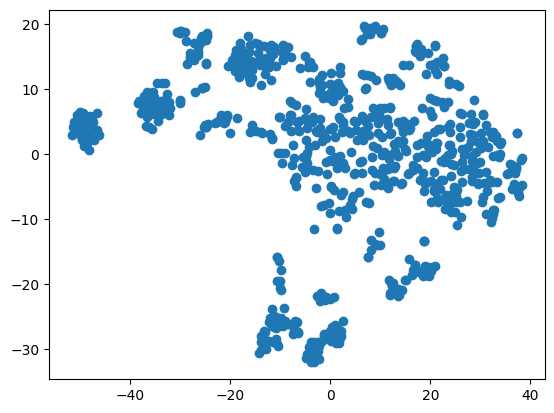

In [67]:
plt.scatter(comps[:,0], comps[:,1])
plt.show()